c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

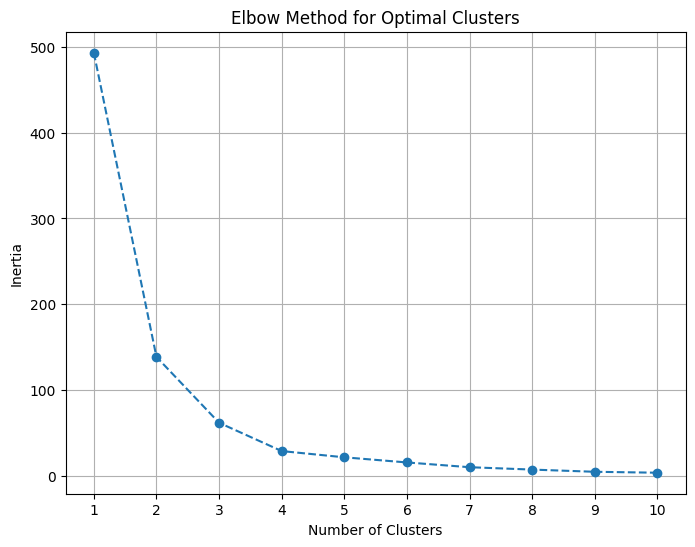

c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


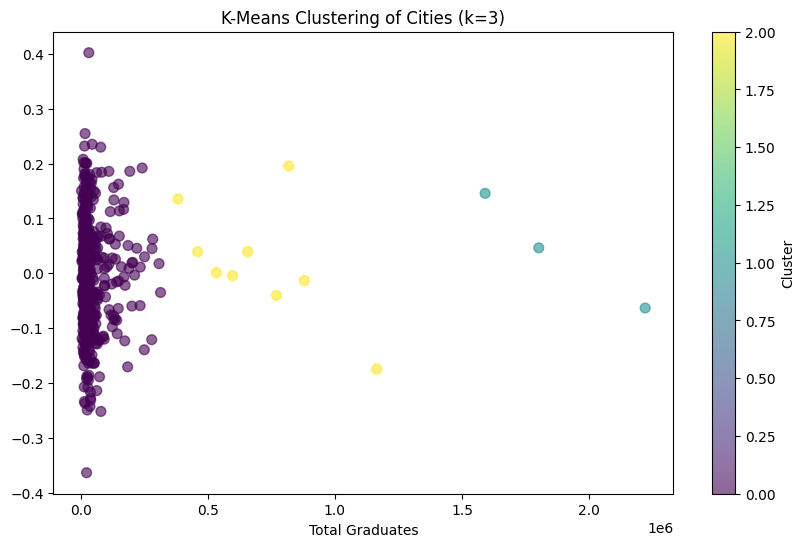

  name_of_city  total_graduates  cluster
0      Abohar             16287        0
1    Achalpur              8863        0
2    Adilabad             10565        0
3   Adityapur             19225        0
4       Adoni             11902        0


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('cities_r2.csv')

# Ensure 'total_graduates' column exists
if 'total_graduates' not in data.columns:
    raise ValueError("The 'total_graduates' column is missing from the dataset!")

# Standardize the 'total_graduates' column
scaler = StandardScaler()
data['total_graduates_scaled'] = scaler.fit_transform(data[['total_graduates']])

# Elbow Method to determine the optimal number of clusters
inertias = []
for k in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['total_graduates_scaled']])
    inertias.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the Elbow plot
optimal_clusters = 3  # Update this after inspecting the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['total_graduates_scaled']])

# Plot the clusters with jitter for better visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['total_graduates'], np.random.normal(0, 0.1, len(data)), c=data['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Total Graduates')
plt.title(f'K-Means Clustering of Cities (k={optimal_clusters})')
plt.show()

# Show the first few rows with cluster labels
print(data[['name_of_city', 'total_graduates', 'cluster']].head())
